In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('./data.csv')

In [17]:
print(data.values.shape)
print(data.keys())
data = data.dropna()
data = data.reset_index(drop=True)
data = data.drop(columns=['Model', 'Make'])
print(data.values.shape)
data.head()

(11914, 16)
Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')
(8084, 14)


,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [18]:
feature = 'Market Category'
unq_vals = []
new_data = []
for val in data[feature]:
    tmp = val.split(sep=',')
    for i in tmp:
        if i not in unq_vals:
            unq_vals.append(i)
print(unq_vals, len(unq_vals), sep='\n')
count = 0

# for i in range(data.shape[0]):
#     vals = data[feature].values[i].split(',')
#     print(vals, [data[feature][i]])

for val in data[feature].values:
    tmp_data = [0 for i in range(len(unq_vals))]
    tmp = val.split(sep=',')
    
    for i in range(len(tmp)):
        for j in range(len(unq_vals)):
            if tmp[i] == unq_vals[j]:
                tmp_data[j] = 1.0
    new_data.append(tmp_data)
    count += 1
new_data = np.asarray(new_data)
print(new_data.shape)
new_df = pd.DataFrame(new_data, columns=unq_vals)
data = data.join(new_df)
data = data.drop(columns=['Market Category'])
data.head()

['Factory Tuner', 'Luxury', 'High-Performance', 'Performance', 'Flex Fuel', 'Hatchback', 'Hybrid', 'Diesel', 'Exotic', 'Crossover']
10
(8084, 10)


,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,...,Factory Tuner,Luxury,High-Performance,Performance,Flex Fuel,Hatchback,Hybrid,Diesel,Exotic,Crossover
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
feature = 'Year'
bin1 = [1990, 2000]
bin2 = [2000, 2005]
bin3 = [2005, 2010]
bin4 = [2010, 2015]
bin5 = [2015, 2017]
bins = [bin1, bin2, bin3, bin4, bin5]
year_bins = []
for i in range(data.shape[0]):
    tmp = [0 for i in range(len(bins))]
    ye = data['Year'][i]
    for j in range(len(bins)):
        if ye >= bins[j][0] and ye < bins[j][1]:
            tmp[j] = 1.0
    year_bins.append(tmp)
year_bins = np.asarray(year_bins)
new_df = pd.DataFrame(year_bins, columns=['Year_Bin'+str(i+1) for i in range(len(bins))])
data = data.join(new_df)
data = data.drop(columns=['Year'])
data.head()

,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,...,Hatchback,Hybrid,Diesel,Exotic,Crossover,Year_Bin1,Year_Bin2,Year_Bin3,Year_Bin4,Year_Bin5
0,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
non_numeric_features = []
numeric_features = []
for i in range(len(data.keys())):
    if isinstance(data[data.keys()[i]].values[1], str):
        non_numeric_features.append(data.keys()[i])
    else:
        numeric_features.append(data.keys()[i])
    
print('String Keys - ', non_numeric_features, sep='\n')
print('Non-String Keys - ', numeric_features, sep='\n')

String Keys - 
['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
Non-String Keys - 
['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'Factory Tuner', 'Luxury', 'High-Performance', 'Performance', 'Flex Fuel', 'Hatchback', 'Hybrid', 'Diesel', 'Exotic', 'Crossover', 'Year_Bin1', 'Year_Bin2', 'Year_Bin3', 'Year_Bin4', 'Year_Bin5']


In [21]:
def print_bar(data, feature):
    print(feature, ' : ', len(data[feature].unique()))
    print(data.values.shape)
    counts = data[feature].value_counts()
    print(data[feature].unique())
    print('Min : {} \t Max : {}'.format(min(data[feature].unique()), max(data[feature].unique())))
    print(counts.values)
    plt.bar((['f'+str(i) for i in range(len(data[feature].unique()))]), counts.values)
    plt.title(feature)
    plt.show()

Year_Bin1  :  2
(8084, 27)
[0. 1.]
Min : 0.0 	 Max : 1.0
[7501  583]


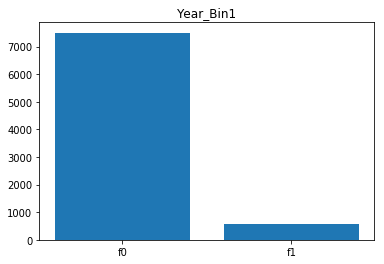

Year_Bin2  :  2
(8084, 27)
[0. 1.]
Min : 0.0 	 Max : 1.0
[7708  376]


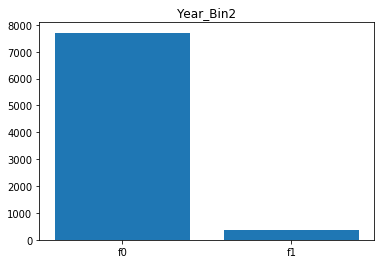

Year_Bin3  :  2
(8084, 27)
[0. 1.]
Min : 0.0 	 Max : 1.0
[7159  925]


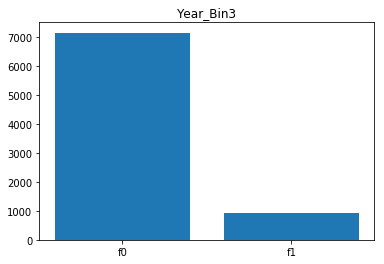

Year_Bin4  :  2
(8084, 27)
[1. 0.]
Min : 0.0 	 Max : 1.0
[6501 1583]


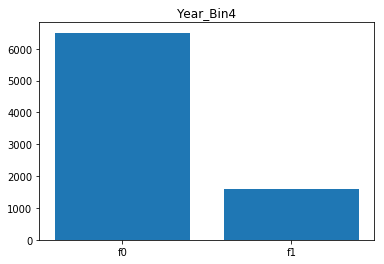

Year_Bin5  :  2
(8084, 27)
[0. 1.]
Min : 0.0 	 Max : 1.0
[4731 3353]


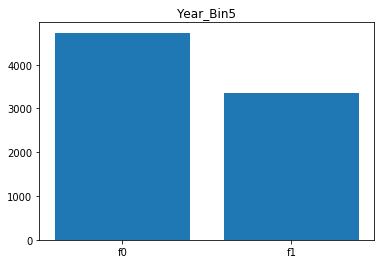

In [22]:
features = ['Year_Bin'+str(i+1) for i in range(len(bins))]
for feat in features:
    print_bar(data, feat)

Factory Tuner  :  2
(8084, 27)
[1. 0.]
Min : 0.0 	 Max : 1.0
[7466  618]


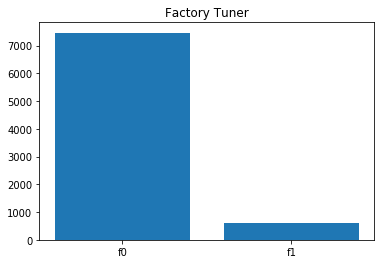

Luxury  :  2
(8084, 27)
[1. 0.]
Min : 0.0 	 Max : 1.0
[4805 3279]


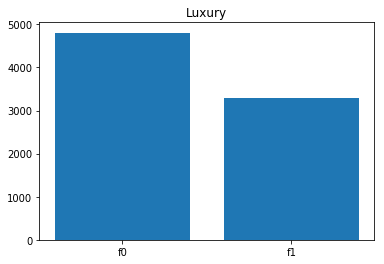

High-Performance  :  2
(8084, 27)
[1. 0.]
Min : 0.0 	 Max : 1.0
[6706 1378]


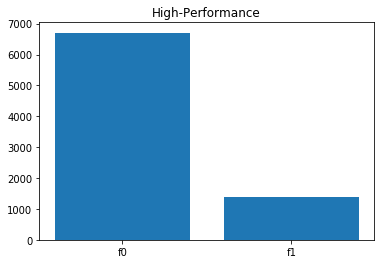

Performance  :  2
(8084, 27)
[0. 1.]
Min : 0.0 	 Max : 1.0
[6006 2078]


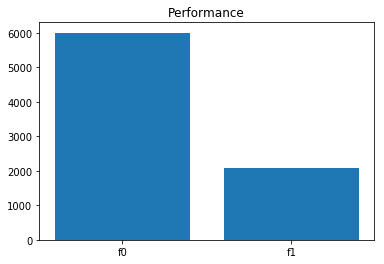

Flex Fuel  :  2
(8084, 27)
[0. 1.]
Min : 0.0 	 Max : 1.0
[6893 1191]


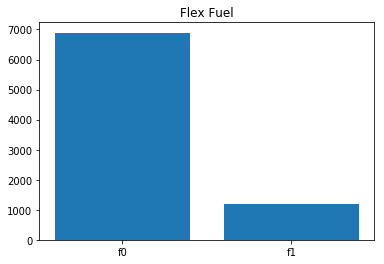

Hatchback  :  2
(8084, 27)
[0. 1.]
Min : 0.0 	 Max : 1.0
[6903 1181]


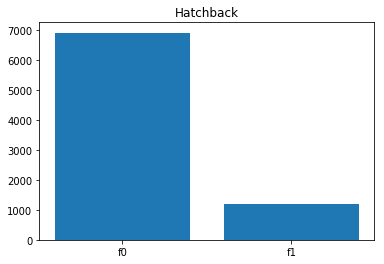

Hybrid  :  2
(8084, 27)
[0. 1.]
Min : 0.0 	 Max : 1.0
[7741  343]


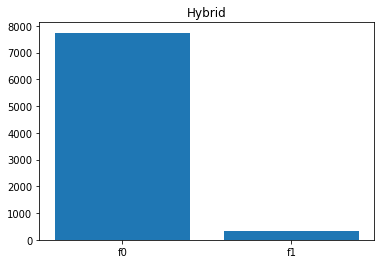

Diesel  :  2
(8084, 27)
[0. 1.]
Min : 0.0 	 Max : 1.0
[7879  205]


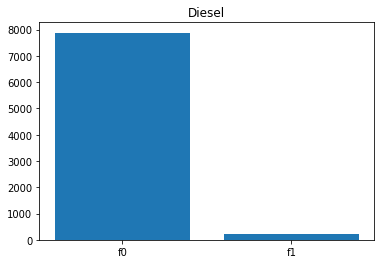

Exotic  :  2
(8084, 27)
[0. 1.]
Min : 0.0 	 Max : 1.0
[7602  482]


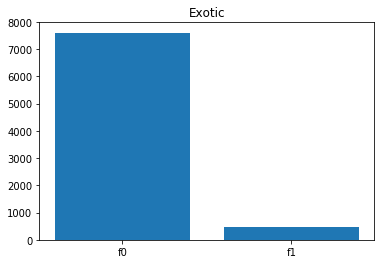

Crossover  :  2
(8084, 27)
[0. 1.]
Min : 0.0 	 Max : 1.0
[6058 2026]


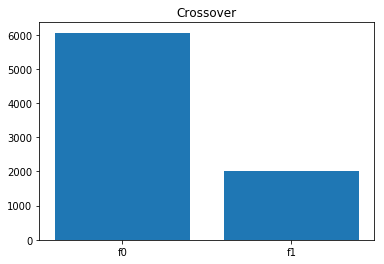

In [23]:
features = ['Factory Tuner', 'Luxury', 'High-Performance', 'Performance', 'Flex Fuel', 'Hatchback', 'Hybrid', 'Diesel', 'Exotic', 'Crossover']
for val in features:
    print_bar(data, val)

Engine Fuel Type  :  8
(8084, 27)
['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'
 'flex-fuel (premium unleaded recommended/E85)' 'electric'
 'flex-fuel (premium unleaded required/E85)']
Min : diesel 	 Max : regular unleaded
[3507 1973 1477  881  153   54   26   13]


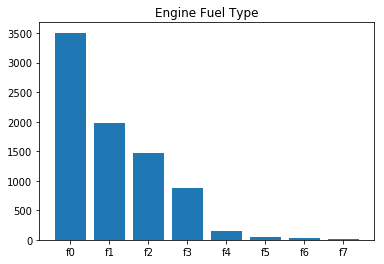

Transmission Type  :  5
(8084, 27)
['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']
Min : AUTOMATED_MANUAL 	 Max : UNKNOWN
[5761 1695  610   15    3]


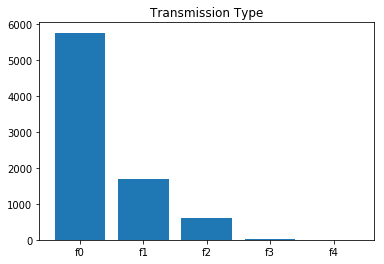

Driven_Wheels  :  4
(8084, 27)
['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']
Min : all wheel drive 	 Max : rear wheel drive
[2879 2401 2158  646]


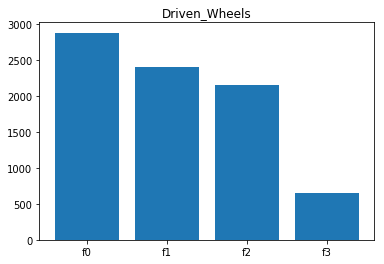

Vehicle Size  :  3
(8084, 27)
['Compact' 'Midsize' 'Large']
Min : Compact 	 Max : Midsize
[3187 3039 1858]


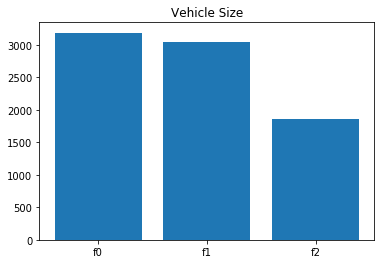

Vehicle Style  :  16
(8084, 27)
['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback' '2dr Hatchback'
 '4dr SUV' 'Crew Cab Pickup' 'Extended Cab Pickup' 'Regular Cab Pickup'
 'Passenger Minivan' 'Cargo Minivan' '2dr SUV' 'Convertible SUV'
 'Cargo Van' 'Passenger Van']
Min : 2dr Hatchback 	 Max : Wagon
[2093 1909  939  678  670  503  357  344  191  176  100   65   34   14
    6    5]


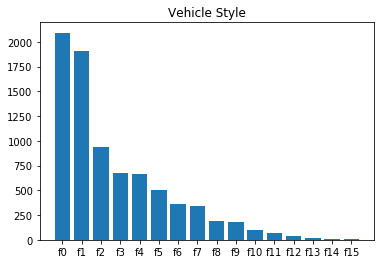

In [24]:
for feat in non_numeric_features:
    print_bar(data, feat)


In [25]:
norm_features = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity']
for feat in norm_features:
    data[[feat]] = data[[feat]]/data[[feat]].mean()
mean_y_true = data[['MSRP']].mean()
data[['MSRP']] = data[['MSRP']] / mean_y_true
data[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']].describe()


,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
count,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000
mean,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.418738,0.326421,0.289689,0.366170,0.942949,1.403822
min,0.200260,0.000000,0.450266,0.357989,0.001334,0.039942
25%,0.699090,0.692271,0.825488,0.818260,0.366147,0.517623
50%,0.961249,1.038407,0.975576,0.920543,0.675605,0.699084
75%,1.165150,1.038407,1.125665,1.125108,1.339871,0.973036
max,3.644735,2.769086,13.282846,7.006352,3.772848,41.258076


In [26]:
data = pd.get_dummies(data, dummy_na=False, columns=['Engine Fuel Type', 'Transmission Type', 
                                               'Driven_Wheels', 'Vehicle Size', 'Vehicle Style', 'Number of Doors'])
print(data.shape)
for key in data.keys():
    print(key)
data.head()

(8084, 60)
Engine HP
Engine Cylinders
highway MPG
city mpg
Popularity
MSRP
Factory Tuner
Luxury
High-Performance
Performance
Flex Fuel
Hatchback
Hybrid
Diesel
Exotic
Crossover
Year_Bin1
Year_Bin2
Year_Bin3
Year_Bin4
Year_Bin5
Engine Fuel Type_diesel
Engine Fuel Type_electric
Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)
Engine Fuel Type_flex-fuel (premium unleaded required/E85)
Engine Fuel Type_flex-fuel (unleaded/E85)
Engine Fuel Type_premium unleaded (recommended)
Engine Fuel Type_premium unleaded (required)
Engine Fuel Type_regular unleaded
Transmission Type_AUTOMATED_MANUAL
Transmission Type_AUTOMATIC
Transmission Type_DIRECT_DRIVE
Transmission Type_MANUAL
Transmission Type_UNKNOWN
Driven_Wheels_all wheel drive
Driven_Wheels_four wheel drive
Driven_Wheels_front wheel drive
Driven_Wheels_rear wheel drive
Vehicle Size_Compact
Vehicle Size_Large
Vehicle Size_Midsize
Vehicle Style_2dr Hatchback
Vehicle Style_2dr SUV
Vehicle Style_4dr Hatchback
Vehicle Style_4dr SUV
Vehi

,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP,Factory Tuner,Luxury,High-Performance,Performance,...,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon,Number of Doors_2.0,Number of Doors_3.0,Number of Doors_4.0
0,1.219766,1.038407,0.975576,0.971684,2.611715,0.921361,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1.092328,1.038407,1.050621,0.971684,2.611715,0.811820,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,1.092328,1.038407,1.050621,1.022825,2.611715,0.725945,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0.837452,1.038407,1.050621,0.920543,2.611715,0.588145,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,0.837452,1.038407,1.050621,0.920543,2.611715,0.688999,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
# X = data.drop(columns=['MSRP'])
# Y = data[['MSRP']]
# print(X.values.shape, Y_true.values.shape)
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()
# for i in range(5):
#     model = lr.fit(X, Y_true)
# print(Y_true.values[0:2])
# model.predict(X.values[0:2])

(8084, 59) (8084, 1)
Starting Training...
Loss after 1 iterations : 669.5468139648438
Loss after 1001 iterations : 3.100541591644287
Loss after 2001 iterations : 2.3736746311187744
Loss after 3001 iterations : 2.0315942764282227
Loss after 4001 iterations : 1.816029667854309
Loss after 5001 iterations : 1.663917064666748
Loss after 6001 iterations : 1.548828125
Loss after 7001 iterations : 1.4573649168014526
Loss after 8001 iterations : 1.3820648193359375
Loss after 9001 iterations : 1.3184845447540283


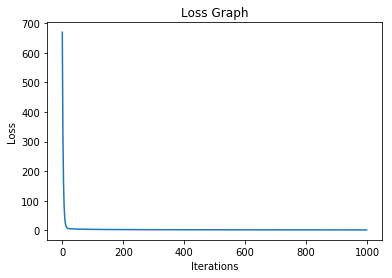

In [28]:
import tensorflow as tf

x_data = data.drop(columns=['MSRP']).values
y_data = data[['MSRP']].values
numFeatures = x_data.shape[1]
print(x_data.shape, y_data.shape)

# Placeholders

x = tf.placeholder(tf.float32, [None, numFeatures])
y_true = tf.placeholder(tf.float32, [None, 1])

# Variables

weights = tf.Variable(tf.random_normal(
    [numFeatures, 1], mean=2.0, stddev=0.5), name='weights')
biases = tf.Variable(
    tf.random_normal([1], mean=2.0, stddev=0.5), name='biases'
)

# Model

dense_1 = tf.add(tf.matmul(x, weights), biases)

loss = tf.reduce_mean(tf.square(dense_1-y_true))

optimizer = tf.train.GradientDescentOptimizer(1e-3).minimize(loss)

init = tf.global_variables_initializer()

# Training
epochs = 10000
losses = []

print('Starting Training...')
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        _, ls = sess.run([optimizer, loss], feed_dict={x: x_data, y_true:y_data})
        if i % 1000 == 0:
            print('Loss after {} iterations : {}'.format(i+1, ls))
        if i % 10 == 0:
            losses.append(ls)
    prediction = sess.run(dense_1, feed_dict={x:x_data[0:2], y_true:y_data[0:2]})
#     print('Predicted : {}'.format(prediction))
#     print('Actual Values : {}'.format(y_data[0:2]))

# Plots

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.plot(losses)
plt.show()

In [37]:
max_y_true.values

array([2065902])